In [13]:
from matplotlib import pyplot as plt
def calculate_diffusion(initial_function, length, target_time, coefficient, left_boundary, right_boundary):

  #initial_function describes the initial distribution of heat on the bar
  #target_time is how far into the future we want the process to evolve
  #coefficient is the diffusivity coefficient of the bar, or how quickly heat diffuses through it
  #left_boundary and right_boundary are the time dependent boundary conditions

  xvals = []   #need to know our x values for the graph. We imagine the bar as straddling the x-axis between 0 and its length
  for i in range(1000):
    xvals.append(length*i/1000)


  t = 0
  i = 0
  delta_x = length/1000   #set up our x and t finite differences. For this method to be numerically stable, we need delta_t <= (delta_x**2)/(2*coefficient)
  delta_t = (delta_x**2)/(2*coefficient)

  data = []  #we will put our initial condition in data
  for g in range(1000):
    data.append(initial_function(g*length/1000))


  while(t<target_time): 

    new_data = [None]*1000  #we will put our updated values in new_data and then copy them over to data
    new_data[0] = left_boundary(t)  #use boundary conditions
    new_data[999] = right_boundary(t) 

    for j in range(998):
      second_derivative = (data[j+2] - 2*data[j+1] + data[j])/(delta_x**2)     #the heat equation is u_t = ku_xx, so we need the second derivative of our function
      new_data[j+1] = data[j+1] + (coefficient * delta_t * second_derivative)  #finite difference calculation to determine new values 

    data = new_data.copy()
    t = t + delta_t  #update time

    if(i%10000 == 0):    #display the heat distribution and the time
      print(t)
      for g in range(len(data)):
        plt.plot(xvals, data[g])
      plt.show()
    i = i+1

  return data   #give us the list of values corresponding to heat distribution at or just after the target time
      


In [10]:
import math
def func(x): 
  return math.sin(x)    
def left_boundary(t):   #I have chosen constant boundary conditions so we get to see equilibrium behavior
  return -1
def right_boundary(t):
  return 1


6.579736267392906e-06


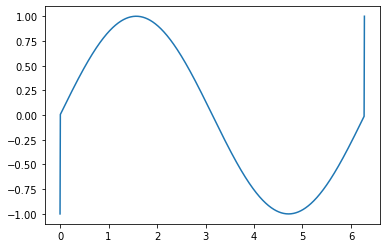

0.06580394241019964


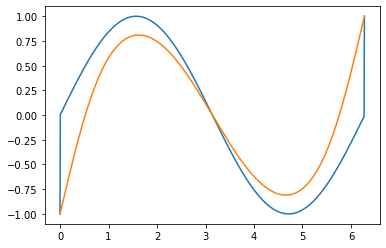

0.13160130508406914


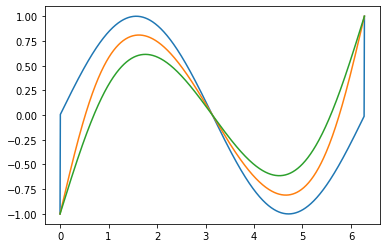

0.19739866775793863


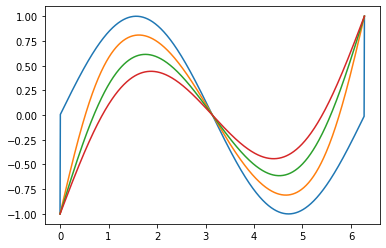

0.2631960304318081


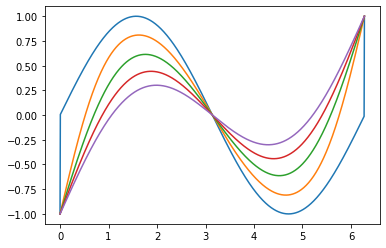

0.3289933931056776


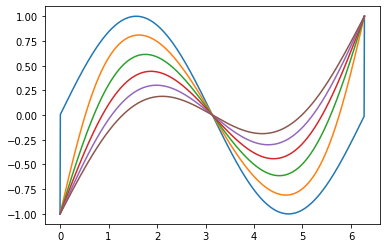

0.3947907557795471


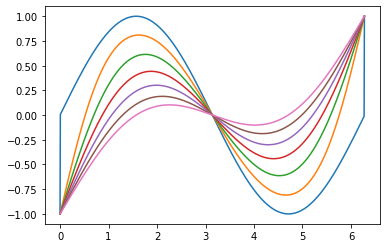

0.4605881184534166


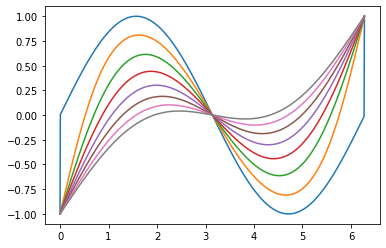

0.5263854811272861


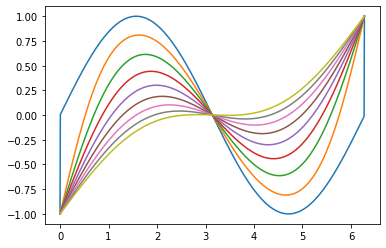

0.5921828438011556


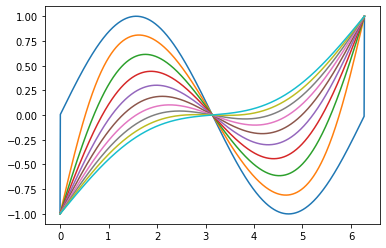

0.6579802064750251


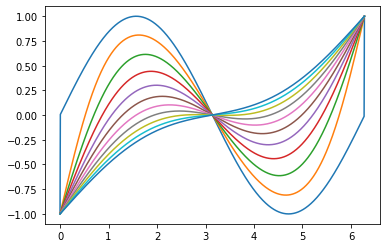

0.7237775691488946


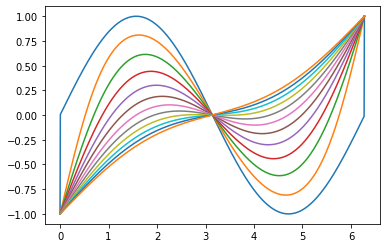

0.7895749318227641


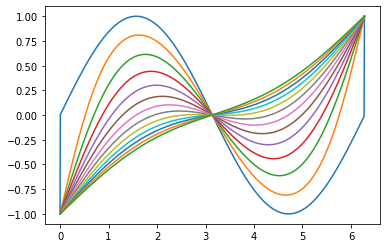

0.8553722944966335


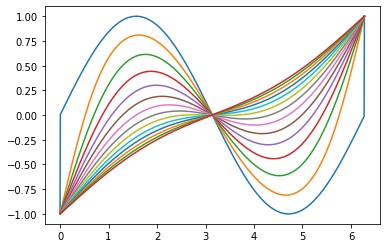

0.921169657170503


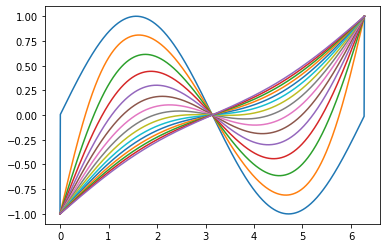

0.9869670198443725


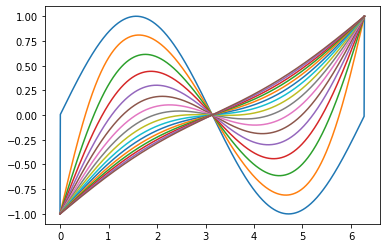

In [14]:
x = calculate_diffusion(func, 2*math.pi, 1, 3, left_boundary, right_boundary) 

In [ ]:
#as expected, the distribution converges to a straight line between the points (0, -1) and (2pi, 1)
